In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1366,ham,Bbq this sat at mine from 6ish. Ur welcome 2 come,NaN,NaN,NaN
5480,ham,Have you seen who's back at Holby?!,NaN,NaN,NaN
408,ham,Headin towards busetop,NaN,NaN,NaN
3253,ham,I can make lasagna for you... vodka...,NaN,NaN,NaN
4131,ham,Hi baby ive just got back from work and i was ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

**Now lets start working with the data and make some amazing conclusions**

## 1. Data Cleaning
## 2. EDA
## 3. Data Preprocessing --vectorization,stemming,remove stop words
## 4. Model Building
## 5. Evaluate the model
## 6. Improve the model
## 7. Website
## 8. Deployment on Heroku


# *1. Data Cleaning*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# the above information shows that columns 2 3 4 have too much null values so it is good to drop it
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
#inplace= True because we permanently want to bring change in the original dataset
df.sample(5)

,v1,v2
1973,ham,I had askd u a question some hours before. Its...
4299,ham,Erm... Woodland avenue somewhere. Do you get t...
5102,spam,This msg is for your mobile content order It h...
5559,ham,if you aren't here in the next &lt;#&gt; hou...
2847,ham,Sad story of a Man - Last week was my b'day. M...


In [7]:
# as the column names are not to descriptive lets rename the names of the columns
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [8]:
df.sample(5)

,message_type,message
679,ham,Missed your call cause I was yelling at scrapp...
1089,ham,Goodmorning today i am late for &lt;DECIMAL&g...
1737,ham,I cant pick the phone right now. Pls send a me...
136,ham,He is there. You call and meet him
661,ham,Then mum's repent how?


In [9]:
# in the message type, they are classified as 'ham' and 'spam' but we want it as 1 and O so lets import Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [11]:
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

2142    0
1864    0
3916    0
3713    0
5498    0
Name: message_type, dtype: int64

In [12]:
df[df['message_type']==1]
# there are 747 spam messages in the dataset

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [13]:
#now lets check the missing values
df.isnull().sum()
# there are no missing values

message_type    0
message         0
dtype: int64

In [14]:
# now lets check for duplicated values
df.duplicated().sum()


403

*There are 403 duplicate values so we simply have to remove those values* 

In [15]:
#remove the duplicates
df= df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

# 2. Exploratory Data Analysis

### *Lets visualize this classification problem to get a better understanding of the data*

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

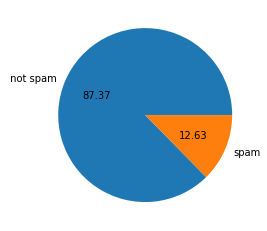

In [19]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

### there is imbalance in data

In [20]:
# no. of alphabets in the data
# no. of sentences in the data
# no. of words in the data

### *Now lets make 3 new columns in the data depicting the no. of characters,words and sentences*

In [21]:
#natural language tool kit
import nltk

In [22]:
#find the number of alpha numeric characters in the messages column
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#fetch number of words using NLTK
from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object